# TP3

In [29]:
from PIL import Image
import os

images = []
cpt = 0

for filename in os.listdir("fruits"):
    if cpt == 100:
        break
    im = Image.open("fruits/" + filename)
    im = im.resize((100, 100))
    print(im)
    images.append(im)
    cpt += 1

print(images)

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A78125B50>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26F2EE10>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A008B0F10>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A272CA0D0>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F49F8D8D3D0>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26CC9590>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F49BEB05750>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26B4D710>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26B4D7D0>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F49BEBFA310>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26B4D950>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26B4DA90>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F49BEB45CD0>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26B4DC90>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F4A26B4DD50>
<PIL.Image.Image image mode=RGB size=100

In [30]:
for i in range(0, len(images)):
    im_rotate = images[i].rotate(90)
    images.append(im_rotate)
print(len(images))

200


In [31]:
for i in range(0, len(images)):
    im_flip = images[i].transpose(Image.FLIP_TOP_BOTTOM)
    images.append(im_flip)
print(len(images))

400


In [32]:
# for i in range(0, len(images)):
#     im_flip = images[i].transpose(Image.FLIP_LEFT_RIGHT)
#     images.append(im_flip)
# print(len(images))

In [33]:
# for i in range(0, len(images)):
#     im_crop = images[i].crop((25, 25, 75, 75))
#     images.append(im_crop)
# print(len(images))

In [34]:
# for i in range(0, len(images)):
#     images[i].save("new_fruits/fruit_" + str(i) + ".jpeg")

In [35]:
import numpy as np

np_images = []
for i in range(0, len(images)):
    im = np.array(images[i])/255
    np_images.append(im)

In [36]:
for i in range(0, len(np_images)):
    np_images[i] = np_images[i].flatten()

In [37]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA

data_set = pd.DataFrame(np_images)
# data_set = PCA(2).fit_transform(data_set)
NB_CLUSTERS = 10
kmeans = KMeans(n_clusters=NB_CLUSTERS, random_state=0).fit(data_set)


/home/pichenot/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
print(kmeans.inertia_)
print(kmeans.score(data_set))

665362.2315009059
-665362.2315009059


Cluster 0
Cluster 1


/tmp/ipykernel_26062/2569202183.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9


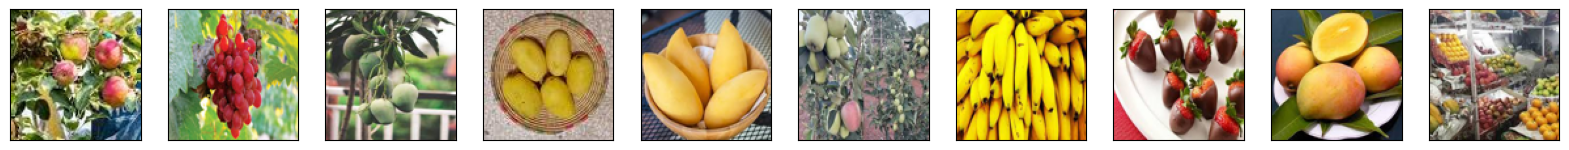

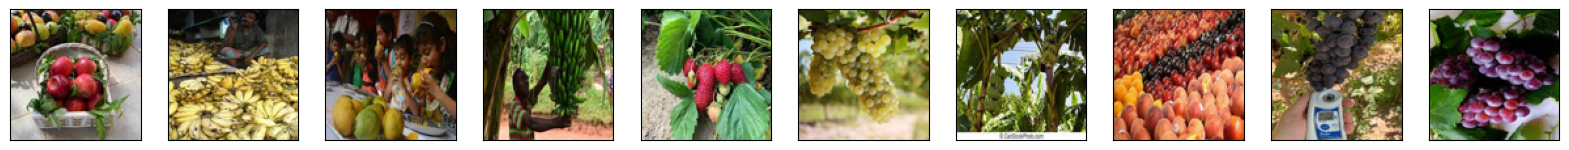

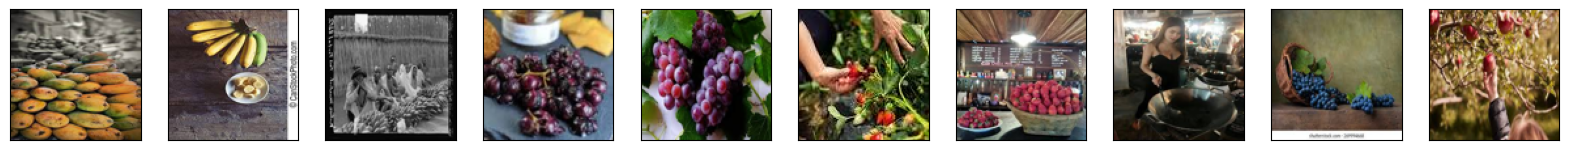

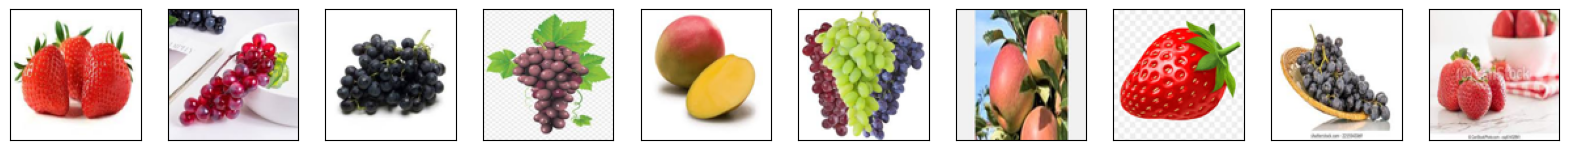

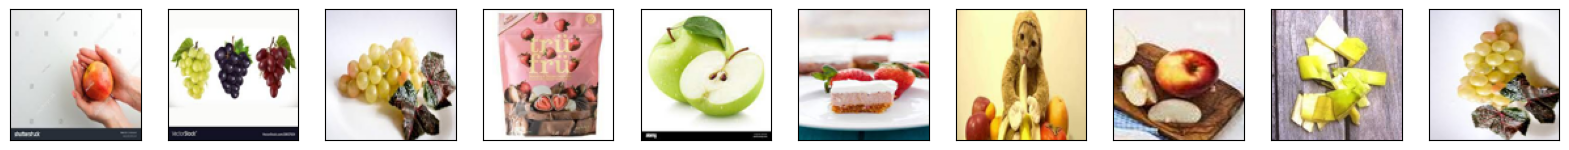

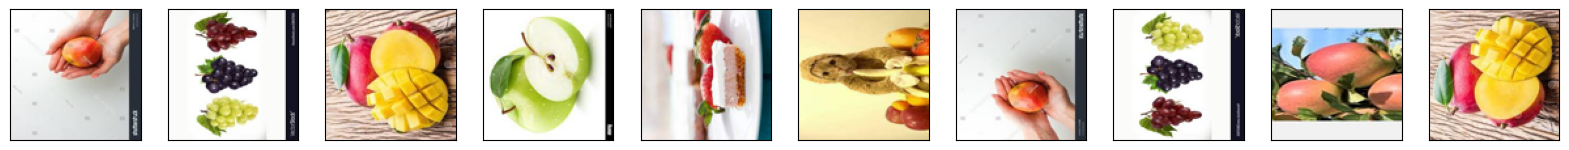

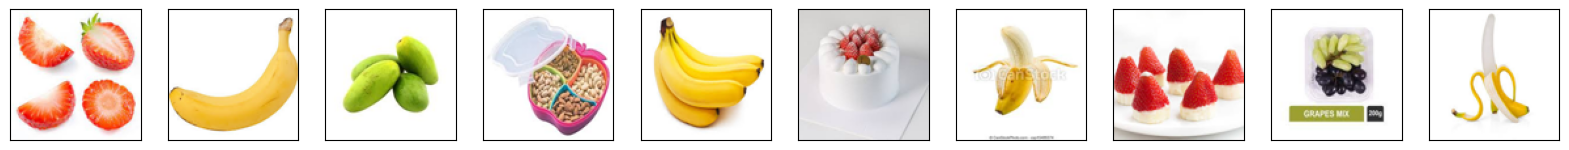

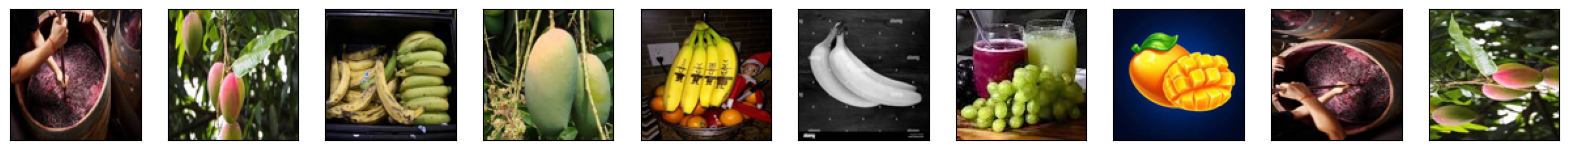

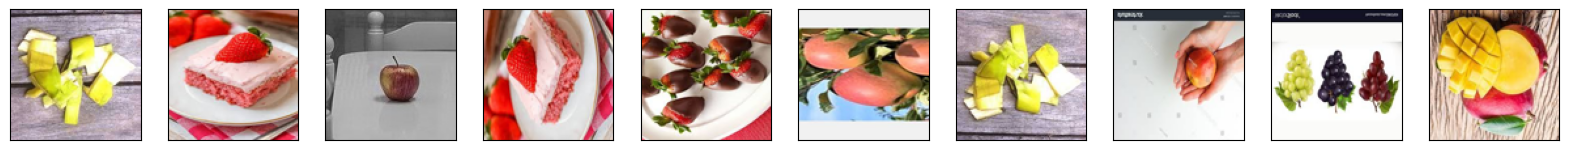

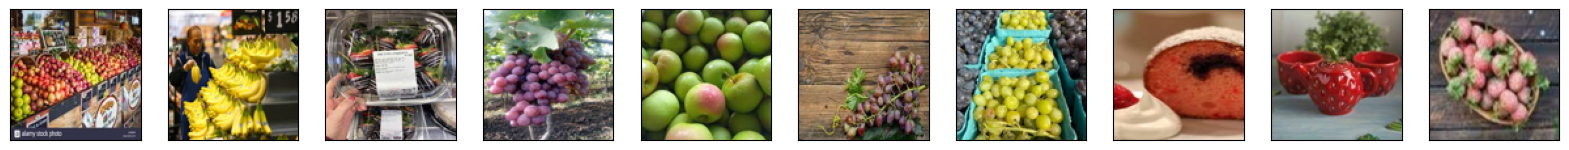

In [39]:
from matplotlib import pyplot as plt

preds = kmeans.predict(data_set)

columns = 10
rows = NB_CLUSTERS
for i in range(0,rows):
    print("Cluster " + str(i))
    fig = plt.figure(figsize=(20, 20))
    errors =0
    for j in range(0, columns):
        try:
            img = data_set.iloc[kmeans.labels_ == i].values[j]
            img = img.reshape((100,100,3))
            img = Image.fromarray((img * 255).astype(np.uint8))
            fig.add_subplot(rows, columns, (i*columns)+j+1, xticks=[], yticks=[])
            plt.imshow(img)
        except:
            print("no more image in cluster " + str(i))
            errors += 1
    if(errors < 3):
        fig.show()